In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
%matplotlib inline


In [44]:
df = pd.read_csv('OrangeN.csv')
df.head()
#x = np.array(df['canopy'].to_numpy()).reshape((-1, 1))
#y = np.array(df['height'].to_numpy())


,Unnamed: 0,location,lat,lon,id,species,datePlanted,height,DBH,canopy,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,89 Moo 15 Tumtaopattana village Klangdong sub-...,1.46919E+16,1.01243E+17,548,Persea americana,Feb-22,0.5,0.02,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,89 Moo 15 Tumtaopattana village Klangdong sub-...,1.46915E+16,1.01243E+17,516,Persea americana,Feb-22,0.6,0.02,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,89 Moo 15 Tumtaopattana village Klangdong sub-...,1.4692E+16,1.01243E+17,557,Persea americana,Feb-22,0.6,0.02,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,89 Moo 15 Tumtaopattana village Klangdong sub-...,1.4692E+16,1.01243E+17,561,Persea americana,Feb-22,0.6,0.02,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,89 Moo 15 Tumtaopattana village Klangdong sub-...,1.46921E+16,1.01243E+17,563,Persea americana,Feb-22,0.6,0.01,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


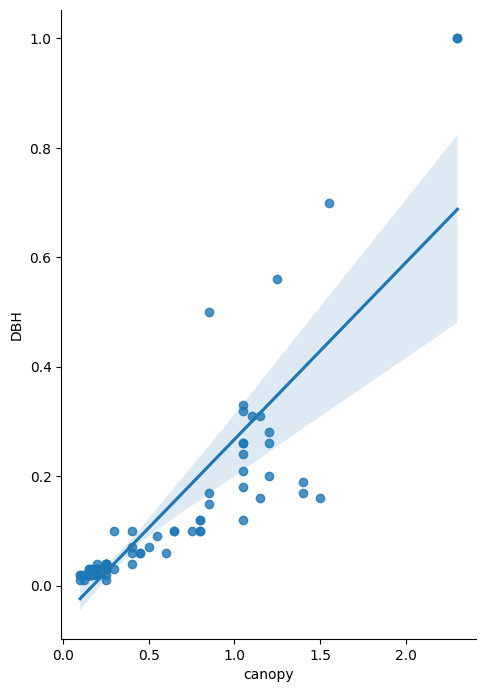

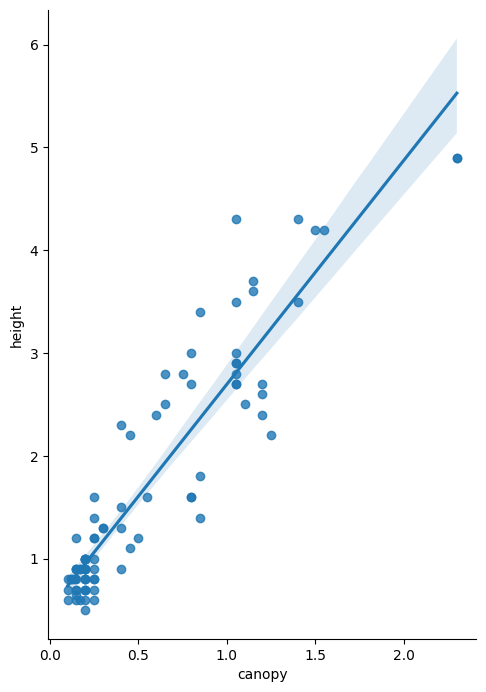

In [57]:

sns.pairplot(df, x_vars=['canopy'], y_vars='DBH', height=7, aspect=0.7, kind='reg')
sns.pairplot(df, x_vars=['canopy'], y_vars='height', height=7, aspect=0.7, kind='reg')

In [52]:
from sklearn.model_selection import train_test_split

#change DBH to height or DBH
X, y = df['canopy'], df['DBH']

#random_state = 8. 8 is the seed, do NOT change
#default split 75/25 from training set to testing set split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)




In [53]:
#it wouldn't work without reshaping, I don't know why
X2 = np.array(X_train.to_numpy()).reshape((-1, 1))

model = LinearRegression().fit(X2, y_train)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: -0.05861833788880513
slope: [0.32160718]


In [54]:
x_test = np.array(X_test.to_numpy()).reshape((-1, 1))
y_pred = model.predict(x_test)

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


0.0674179877564293


In [56]:
r_sq = model.score(X2, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

coefficient of determination: 0.7358171679319021
intercept: -0.05861833788880513
coefficients: [0.32160718]


In [ ]:
y_pred = model.predict(x_)
print(f"predicted response:\n{y_pred}")

predicted response:
[0.91061962 1.12201991 1.0137172  1.10819742 1.14990889 1.08079642
 1.08079642 1.12201991 1.20666282 1.08079642 1.08079642 1.05372074
 1.05372074 1.10819742 1.22105463 1.09445625 1.14990889 1.14990889
 1.1781232  1.20666282 1.14990889 1.35424076 1.32407453 1.14990889
 1.14990889 1.22105463 1.08079642 1.14990889 1.14990889 1.16397538
 1.60728217 1.30911341 1.14990889 1.20666282 1.22105463 1.33911698
 1.29423362 1.22105463 1.29423362 1.14990889 1.36944587 1.36944587
 1.09445625 1.14990889 1.23552777 1.14990889 1.26471803 1.36944587
 1.29423362 1.29423362 1.29423362 1.08079642 1.60728217 1.16397538
 1.22105463 1.33911698 1.57451337 1.14990889 1.22105463 1.19235234
 1.32407453 1.14990889 1.14990889 1.44669138 1.69062745 1.44669138
 1.20666282 1.44669138 1.19235234 1.52597014 1.30911341 1.23552777
 1.14990889 1.14990889 1.22105463 1.22105463 2.13785272 1.44669138
 1.29423362 1.77600599 1.60728217 1.36944587 1.29423362 1.14990889
 1.14990889 1.95286284 2.13785272 2.137852

In [ ]:

x = sm.add_constant(x)

In [ ]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1523.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          7.73e-128
Time:                        14:57:52   Log-Likelihood:                -153.11
No. Observations:                 343   AIC:                             310.2
Df Residuals:                     341   BIC:                             317.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6945      0.043     16.310      0.0

ValueError: ignored